# Module 09: *k*-Nearest Neighbors

**Student Name**: David Yu

**Date**: 3/14/25

## Overview
The k-Nearest neighbor method is a type of instance based learning that uses existing data, with known labels, to predict the label for a new observation. The purpose of this exercise is to demonstrate the use of k-NN for classification using the [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set). 


## Instructions

#### Use the notebook: `k-NN.ipynb` to perform the following:
Question 1. Load and Inspect the data

Question 2. Perform the k-nn analysis using different values of k. Recommend which value is more appropriate and justify your response.

Question 3. Evaluate the prediction accuracy of the k-nn model.

Question 4. Explore different metrics and data partitioning strategies.


### Submission Instructions

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

## Question 1: Inspect the data
In this question you will need to load the data (this was performed for you), inspect the distribution and pairwise relationships between the features. 

In [2]:
#load the data from sklearn.datasets
data     = load_iris()

#divide the data into the input 'X' and the labels 'y'
X        = data['data'] #the observations
y        = data['target'] #the label

In [3]:
#load the data in a pandas dataframe
df          = pd.DataFrame(X, columns=['sepal length', 'sepal width', 'petal length', 'petal width'])
df['class'] = [data['target_names'][idx] for idx in y]



### Question 1.1 (5 pts)
Obtain a statistical summary of the iris flowers sepal and petal features. Use the statistical summary, explain your observation about the iris flowers. Note: You can use the `describe()` function to display the statistical summary.

In [4]:
statistical_summary = df.describe()
print("Statistical Summary:")
print(statistical_summary)

Statistical Summary:
       sepal length  sepal width  petal length  petal width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


- Sepal length and width are typically greater than petal length and width.
- The standard deviation for petal length is 1.765, which indicates that the petal length varies considerably across iris flowers.
- Median and mean of sepal length and width are pretty similar, meaning there is no noticeable skew.
- Median of petal length and width is greater than mean, indicating a skew.

### Question 1.2 (10 pts)
Visualize and discuss the **distribution of each feature** and the **pairwise relationships between features**. Note: Ensure that you discuss the strength of the **correlation** between the features.

- Tip 1: the seaborn library has a pairplot visualization which is useful to display both the distribution of each feature and pairwise relationships.
- Tip 2: another useful visualization is called a correlation matrix. It can be used to visually display the strength of the correlation. 

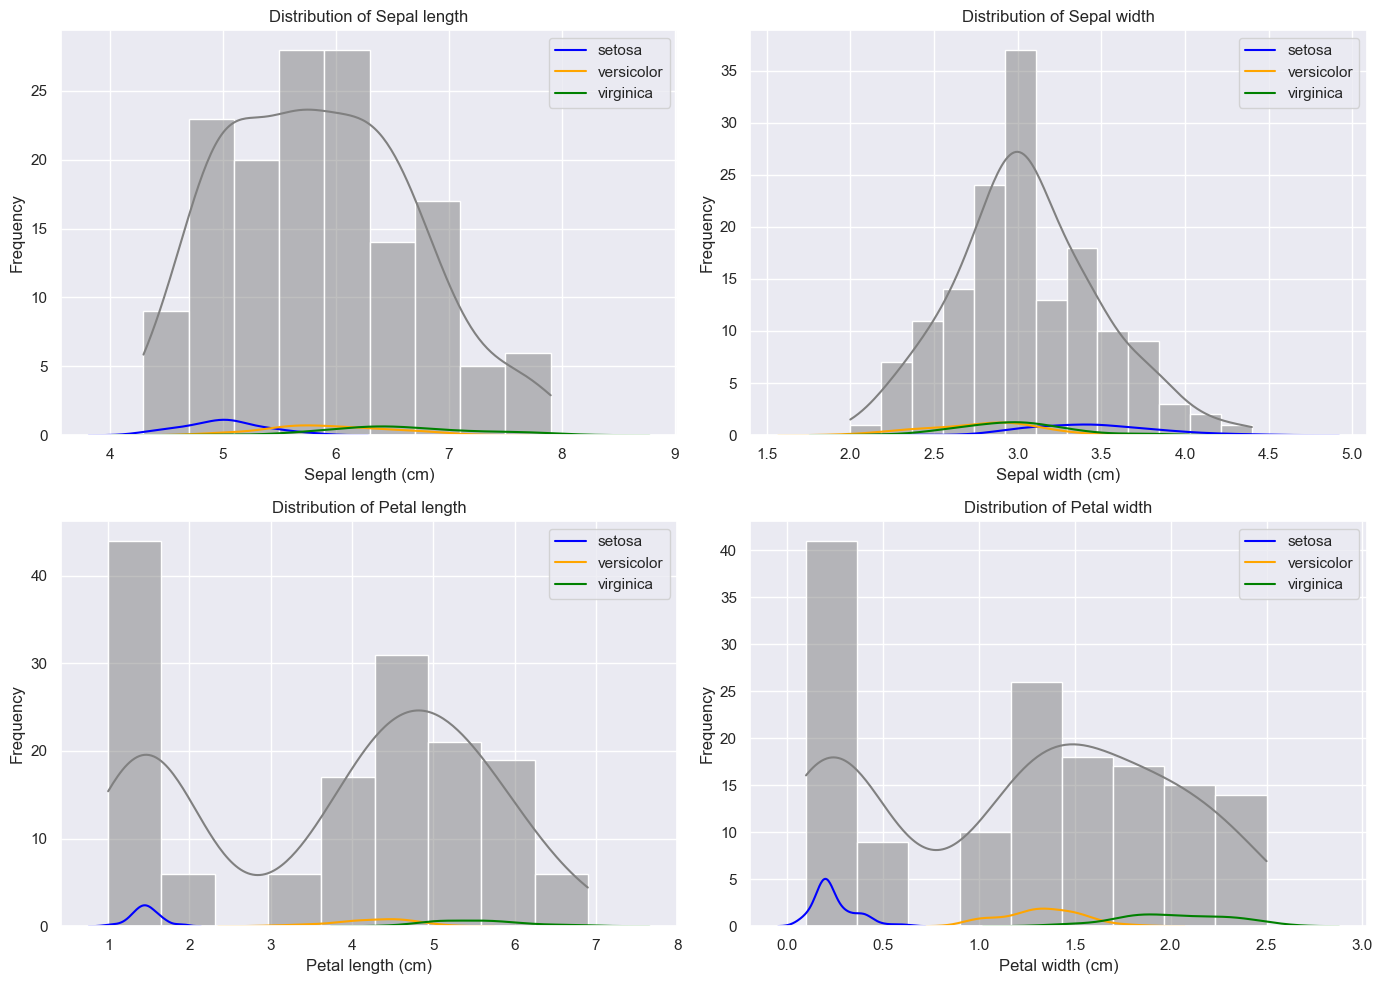

In [ ]:
# Distribution of each feature
plt.figure(figsize=(14, 10))
for i, feature in enumerate(['sepal length', 'sepal width', 'petal length', 'petal width']):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[feature], kde=True, color='gray', alpha=0.5)
    
    for species, color in zip(data['target_names'], ['blue', 'orange', 'green']):
        sns.kdeplot(df[df['class']==species][feature], color=color, label=species)
    
    plt.title(f'Distribution of {feature.capitalize()}')
    plt.xlabel(f'{feature.capitalize()} (cm)')
    plt.ylabel('Frequency')
    plt.legend()
plt.tight_layout()
plt.savefig('feature_distributions.png')
plt.show()

<Figure size 1200x1000 with 0 Axes>

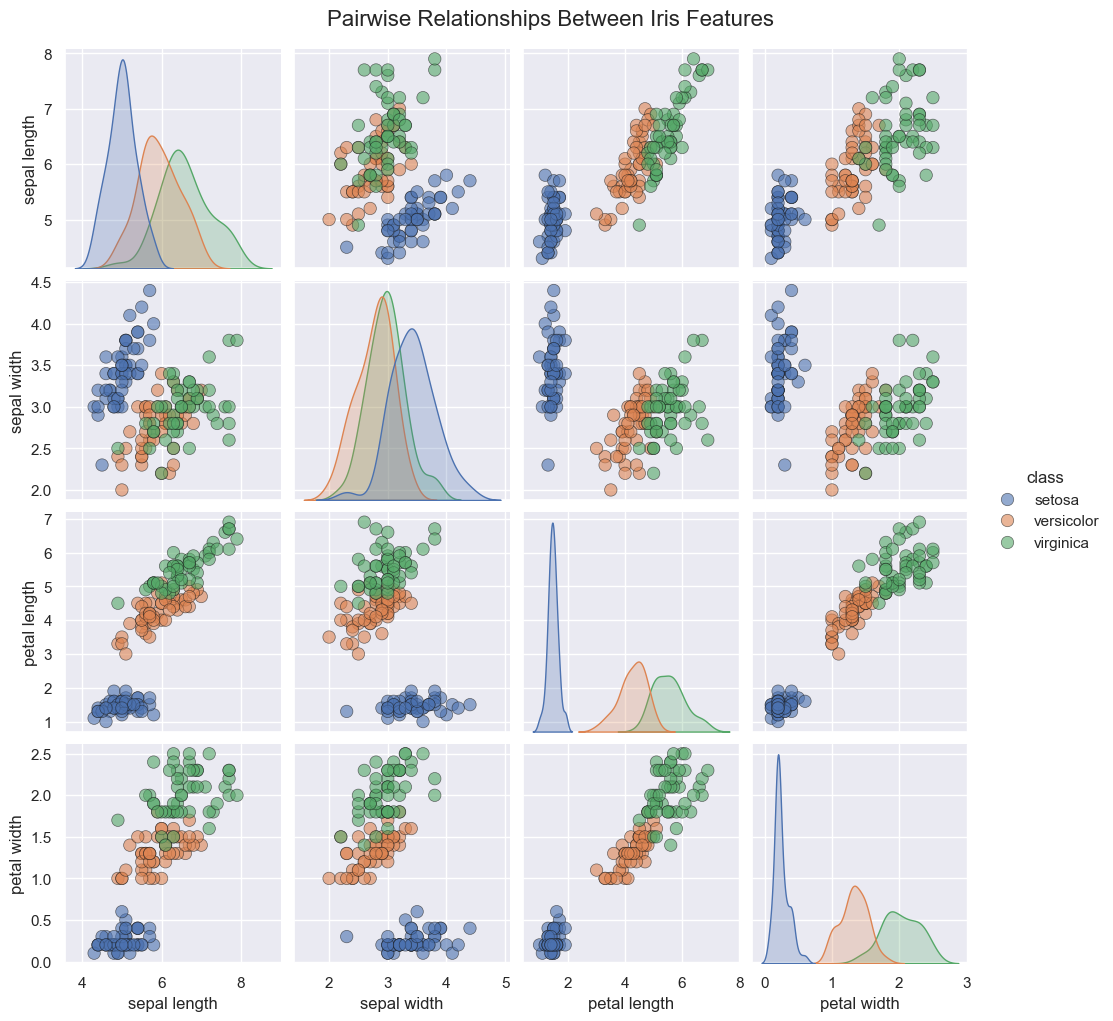

In [6]:
# Pairwise distribution between features
plt.figure(figsize=(12, 10))
pair_plot = sns.pairplot(df, hue='class', diag_kind='kde', 
                         plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k', 'linewidth': 0.5},
                         height=2.5)
pair_plot.fig.suptitle('Pairwise Relationships Between Iris Features', y=1.02, fontsize=16)
plt.savefig('pairwise_relationships.png')
plt.show()

In [9]:
import numpy as np

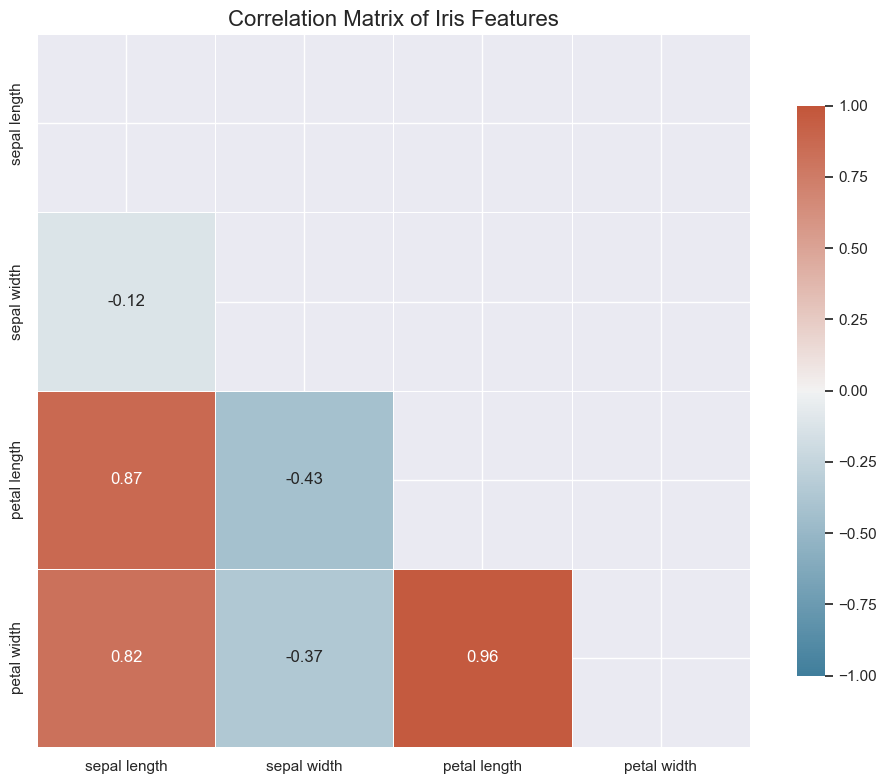

In [10]:
# Correlation matrix
corr_matrix = df.drop('class', axis=1).corr()

plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matrix, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1, 
            square=True, linewidths=.5, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Iris Features', fontsize=16)
plt.tight_layout()
plt.savefig('correlation_matrix.png')
plt.show()

- Petal length and width, sepal length and petal width, and sepal length and petal length all have a relatively strong positive correlation.
- Sepal width and petal length, sepal width and petal length, sepal length and sepal width all have a negative correlation.

## Question 2: Choose *K* (25 pts)

Using the cell below, build a model to predict the target in the iris dataset using the k-NN algorithm. The program should try at least 20 different values of k and evaluate the accuracy of the predictions. After which, display a line graph showing the accuracy for each value of k. Evaluate the results from the graph and recommend the best value of *k*. 

`Note:` If multiple values of *k* are found to be suitable, weigh the pros and cons of choosing a large versus a small value of *k*.

In [20]:
#split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split( 
#                                         #TODO: enter the appropriate values to partition the data, 
#                                         #and ensure your results are reproducible
#                                         #and obtain stratified samples
#                                         ) 

#build the k-nn model, experiment with different values of k and plot the results

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3,
    random_state=42,
    stratify=y   
)

# Testing different values of k
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    
    print(f"k = {k}, Accuracy = {accuracy:.4f}")




k = 1, Accuracy = 0.9333
k = 2, Accuracy = 0.9111
k = 3, Accuracy = 0.9556
k = 4, Accuracy = 0.9556
k = 5, Accuracy = 0.9778
k = 6, Accuracy = 0.9333
k = 7, Accuracy = 0.9556
k = 8, Accuracy = 0.9333
k = 9, Accuracy = 0.9556
k = 10, Accuracy = 0.9556
k = 11, Accuracy = 0.9333
k = 12, Accuracy = 0.9333
k = 13, Accuracy = 0.9333
k = 14, Accuracy = 0.9333
k = 15, Accuracy = 0.9556
k = 16, Accuracy = 0.9556
k = 17, Accuracy = 0.9556
k = 18, Accuracy = 0.9556
k = 19, Accuracy = 0.9556
k = 20, Accuracy = 0.9333


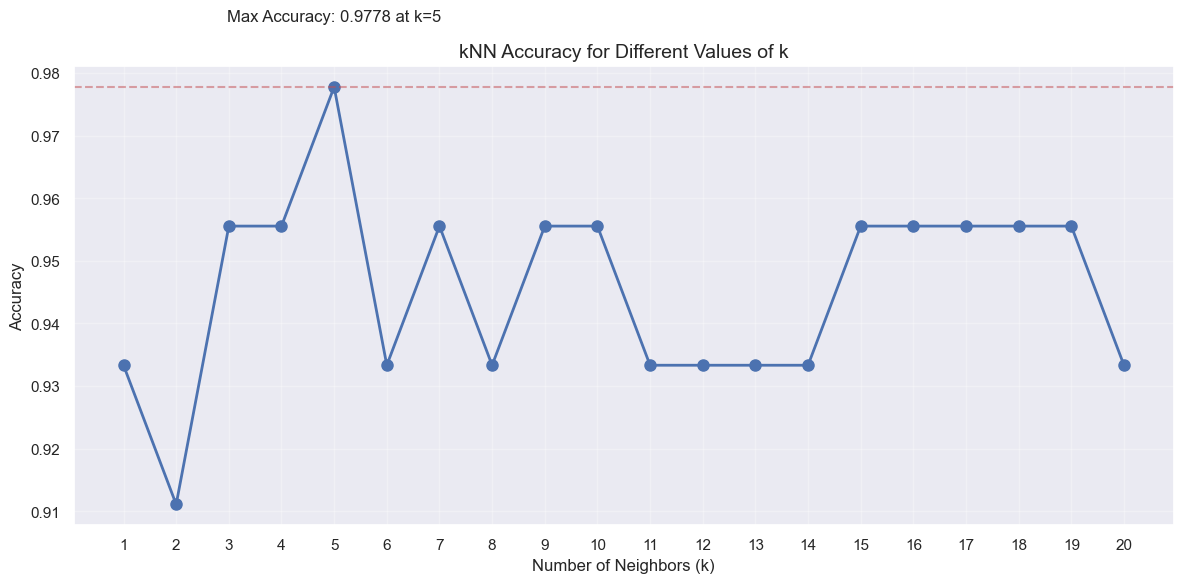

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(k_values, accuracies, 'o-', markersize=8, linewidth=2)
plt.xlabel('Number of Neighbors (k)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('kNN Accuracy for Different Values of k', fontsize=14)
plt.xticks(k_values)
plt.grid(True, alpha=0.3)

# Add a horizontal line at the maximum accuracy
max_accuracy = max(accuracies)
max_k = k_values[accuracies.index(max_accuracy)]
plt.axhline(y=max_accuracy, color='r', linestyle='--', alpha=0.5)
plt.text(max_k, max_accuracy + 0.01, f'Max Accuracy: {max_accuracy:.4f} at k={max_k}', 
         fontsize=12, ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Graph Analysis
- The maximum accuracy of 97.78% is achieved at k=5
- The accuracy generally fluctuates between 91% and 97.78% across different k values
- There's a notable drop in accuracy at k=2
- After the peak at k=5, the accuracy follows a somewhat oscillating pattern
- For k values 15-19, the accuracy stabilizes at approximately 95.6%

Based off the graph, the best k value to recommend is k=5 because it provides the highest accuracy of 0.9778.

## Question 3: Evaluate the Results (5 pts)
Display the classification report for your recommended value of k. Evaluate the report and explain the results. 

## Question 4: Model Evaluation (5 pts)
Answer the following question using a markdown cell.

1. Research the difference between accuracy, precision, and recall. For each metric, provide an example that explains when you would choose one metric over the others.
2. In the lecture we discussed one method to partition your dataset using a train-test split. Identify another approach that can be used to partition your dataset and explain how it works.

`Note``: you do not need to implement code for questions 4.1 and 4.2

## Resources / References
Share any resources that were helpful in your response for question 4. 